In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images[0].shape

(28, 28)

In [4]:
# 채널 추가
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images/255.0, test_images/255.0

In [5]:
train_labels[0]

5

In [11]:
# feature learning
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Flatten()) # 순서대로 1열로 만들기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [15]:
model.compile(optimizer ='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1452 - accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0468 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0134 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0116 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0101 - accuracy: 0.99670s - loss: 0.0101 - accuracy: 
Epoch 10/10
1875/1875 [===========

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9904


In [17]:
test_accuracy

0.9904000163078308

In [10]:
# Functional API
from tensorflow.keras.models import Model

In [20]:
inputs = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)(inputs)
pool1 = layers.MaxPooling2D(padding='same')(conv1)
conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)(pool1)
pool2 = layers.MaxPooling2D(padding='same')(conv2)
conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)(pool2)
pool3 = layers.MaxPooling2D(padding='same')(conv3)
pool3_flat = layers.Flatten()(pool3)
dense4 = layers.Dense(256, activation=tf.nn.relu)(pool3_flat)
drop4 = layers.Dropout(rate=0.2)(dense4)
logits = layers.Dense(units=10, activation='softmax')(drop4)
model = Model(inputs=inputs, outputs=logits)

In [21]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)        

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1251 - accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0227 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.99 - 69s 37ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 10/10
313/313 [=

In [11]:
# Class 함수 사용하여 학습
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)
        self.pool1 = layers.MaxPooling2D(padding='same')
        self.conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)
        self.pool2 = layers.MaxPooling2D(padding='same')
        self.conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)
        self.conv3_flat = layers.Flatten()
        self.dense4 = layers.Dense(256, activation=tf.nn.relu)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, activation='softmax')

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.conv3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

        return net

model = MNISTModel()
model(layers.Input(shape=(28, 28, 1)))
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               

In [26]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1142 - accuracy: 0.9640
Epoch 2/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0410 - accuracy: 0.9870
Epoch 3/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 4/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0215 - accuracy: 0.9934
Epoch 5/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0170 - accuracy: 0.9947
Epoch 6/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0140 - accuracy: 0.9956
Epoch 7/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0119 - accuracy: 0.9959
Epoch 8/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0100 - accuracy: 0.99700s - loss: 0.0101 
Epoch 9/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 10/20
1875/1875 [=======================

In [31]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 2/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 5.2540e-04 - accuracy: 0.99980s - loss: 5.2946e-04 
Epoch 4/20
1875/1875 [==============================] - 79s 42ms/step - loss: 3.7275e-04 - accuracy: 0.9999
Epoch 5/20
1875/1875 [==============================] - 84s 45ms/step - loss: 1.6208e-04 - accuracy: 0.99991s - l
Epoch 6/20
1875/1875 [==============================] - 79s 42ms/step - loss: 4.3526e-05 - accuracy: 1.0000
Epoch 7/20
1875/1875 [==============================] - 67s 36ms/step - loss: 2.1599e-05 - accuracy: 1.0000
Epoch 8/20
1875/1875 [==============================] - 64s 34ms/step - loss: 1.1304e-05 - accuracy: 1.0000
Epoch 9/20
1875/1875 [==============================] - 65s 35ms/step - loss: 9.0697e-06 - accuracy: 1.0000
Epoch 10

## train_test_split 학습

In [6]:
# train_test_split를 사용하여 학습
from sklearn.model_selection import train_test_split

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, 
                                                                        test_labels, 
                                                                        test_size=0.2,
                                                                        shuffle=True)

In [7]:
len(valid_images), len(test_images)

(8000, 2000)

In [15]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data = (valid_images, valid_labels), epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0229 - val_accuracy: 0.9933
Epoch 2/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0263 - val_accuracy: 0.9945
Epoch 3/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0275 - val_accuracy: 0.9940
Epoch 4/20
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0292 - val_accuracy: 0.9935
Epoch 5/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0317 - val_accuracy: 0.9935
Epoch 6/20
1875/1875 [==============================] - 69s 37ms/step - loss: 3.5066e-04 - accuracy: 0.9999 - val_loss: 0.0290 - val_accuracy: 0.9944
Epoch 7/20
1875/1875 [==============================] - 68s 36ms/step - loss: 1.9715e-04 - accuracy: 0.9999 - val_loss: 

In [13]:
import matplotlib.pyplot as plt

In [16]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

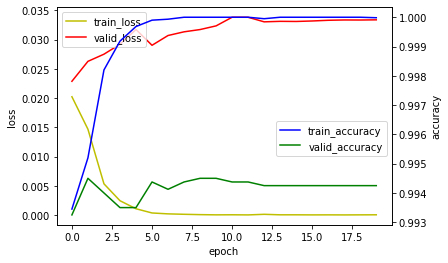

In [18]:
# loss & accuracy 시각화

def display(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

    plt.show()

display(hist)

In [ ]:
# train_test_split를 사용하여 학습 (batch_size & 더 많은 epoch)
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

## ModelCheckpoint & EarlyStopping

In [27]:
# Model의 weight 값 중간 저장(ModelCheckpoint)
# 개선되지 않는 학습에 대한 조기 종료(EarlyStopping) 

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = 'C:/Users/andyj/abangers/멀티캠퍼스(데이터분석)/자연어처리'
model_file_path = f'{MODEL_SAVE_FOLDER_PATH}/mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_file_path,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
# 학습
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200
                 callbacks=[cb_checkpoint, cb_early_stopping])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
# 저장했던 Model의 weight 가져오기
saved_path = 'C:/Users/andyj/abangers/멀티캠퍼스(데이터분석)/자연어처리'
model.load_weights(saved_path)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

In [28]:
#Batch Normalization

from tensorflow.keras.layers import BatchNormalization

class ConvBNRelu(Model):
    def __init__(self, filters, kernel_size=3, strides=(1, 1), padding='same'):
        super(ConvBNRelu, self).__init__()
        self.conv = layers.Conv2D(filters, 
                                  kernel_size=kernel_size, 
                                  strides=strides, 
                                  padding=padding, 
                                  kernel_initializer='glorot_normal'
                                  )
        self.batchnorm = BatchNormalization()

    def call(self, input, training=False):
        layer = self.conv(input)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)

        return layer

In [29]:
class DenseBNRelu(Model):
    def __init__(self, units):
        super(DenseBNRelu, self).__init__()
        self.dense = layers.Dense(units=units, kernel_initializer='glorot_normal')
        self.batchnorm = BatchNormalization()
        
    def call(self, input, training=False):
        layer = self.dense(input)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        
        return layer

In [31]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size= [3, 3], padding='valid')
        self.pool1 = layers.MaxPooling2D(padding='same')
        self.conv2 = ConvBNRelu(64, (3, 3), padding='same')
        self.pool2 = layers.MaxPooling2D(padding='same')
        self.conv3 = ConvBNRelu(128, (3, 3), padding='same')
        self.conv3_flat = layers.Flatten()
        self.dense4 = DenseBNRelu(256)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax')

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.conv3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

        return net

model = MNISTModel()
temp_input = layers.Input(shape=(28, 28, 1))
model(temp_input)
model.summary()

Model: "mnist_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_bn_relu_3 (ConvBNRelu)  (None, 26, 26, 32)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv_bn_relu_4 (ConvBNRelu)  (None, 13, 13, 64)        18752     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv_bn_relu_5 (ConvBNRelu)  (None, 7, 7, 128)         74368     
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_bn_relu_1 (DenseBNRelu (None, 256)             

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

## VGG16 Transfer Learning

In [45]:
import numpy as np
from tensorflow.keras.applications import VGG16

In [46]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
train_images = train_images.reshape(-1, 784).astype('float32')
test_images = test_images.reshape(-1, 784).astype('float32')

In [48]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [49]:
# 3차원으로 만들기
train_images = np.dstack([train_images]*3)
test_images = np.dstack([test_images]*3)
train_images.shape, test_images.shape

((60000, 784, 3), (10000, 784, 3))

In [50]:
train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)
train_images.shape, test_images.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [51]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in test_images])

train_images.shape, test_images.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [52]:
train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, 
                                                                        test_labels, 
                                                                        test_size=0.2,
                                                                        shuffle=True)

In [53]:
# imagenet weight
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
vgg_model.summary()

58892288/58889256 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [54]:
layer_dict = {layer.name : layer for layer in vgg_model.layers}
x = layer_dict['block2_pool'].output

x = ConvBNRelu(filters=64, kernel_size=(3, 3))(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = DenseBNRelu(256)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

In [57]:
custom_model = Model(inputs=vgg_model.input, outputs=x)
custom_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [ ]:
for layer in custom_model.layers[:7]:
    layer.trainable = False

learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

custom_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = '/content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리'
model_file_path = f'{MODEL_SAVE_FOLDER_PATH}/mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_file_path,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=6)

hist = custom_model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

In [ ]:
saved_path = 'C:/Users/andyj/abangers/멀티캠퍼스(데이터분석)/자연어처리'
model.load_weights(saved_path)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)